# Exploring the Enron dataset:

In this project I will explore the ENron email dataset and examine a number of clasifiers to predictthe POI (i.e. Point of Interest) person, based on a number of features extracted from the indivisuals' emails. This process will include identifying and removing the outliers, creating new features based on the previous ones, and engineering classifiers and tuning them to improve the overall prediction accuracy. 

In [205]:
'''First we will read and examine teh dataset'''
import sys
import pickle
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt
from feature_format import featureFormat, targetFeatureSplit

from numpy import mean
from feature_format import featureFormat, targetFeatureSplit
#from tester import dump_classifier_and_data
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import tree
from sklearn.grid_search import GridSearchCV


os.chdir("C:/Users/sur216/Box Sync/school stuff/Udacity (sur216@psu.edu)/Data Analyst/p5_enron/ud120-projects-master/final_project")
data_dict = pickle.load(open("final_project_dataset.pkl", "r"))
print "the number of items in the dictionary is: {0}".format(len(data_dict.keys()))
print "the email sensers/recipients are: {0}".format(data_dict.keys())
print "and the current features for each row in the dataste are: {0}".format(data_dict.values()[1].keys())

the number of items in the dictionary is: 146
the email sensers/recipients are: ['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNAN

146


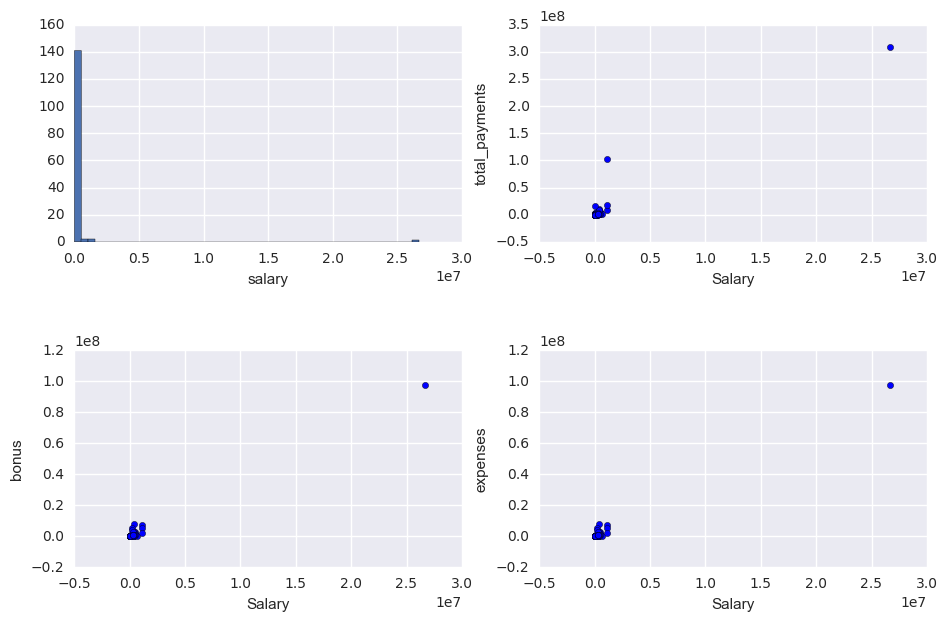

In [206]:
# extract features from the dictionary
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
feature_4 = "bonus"
feature_5 = "expenses"
poi  = "poi"
features_list = [poi, feature_1, feature_2, feature_3,feature_4,feature_5]

# make lists from the dataset for our scatter plots
def finance_to_list (input_data): 
    data = featureFormat(input_data, features_list, remove_all_zeroes=False, remove_any_zeroes=False)
    poi, finance_feat = targetFeatureSplit( data )
    salary = []
    ex_stock = []
    tot_pay = []
    bonus = []
    expens = []
    for point in finance_feat: 
        salary.append(point[0])
        ex_stock.append(point[1])
        tot_pay.append(point[2])
        bonus.append(point[3])
        expens.append(point[4])
    return ([salary,ex_stock,tot_pay,bonus,expens,poi])   

 
print(len(finance_to_list(data_dict)[2]))

# plot multiple subplots
%matplotlib inline
plt.rcParams['figure.figsize'] = (11, 7)
f, axarr = plt.subplots(2, 2)
axarr[0, 0].hist(finance_to_list(data_dict)[0], bins = 50)
axarr[0, 0].set_xlabel('salary')
axarr[0, 1].scatter(finance_to_list(data_dict)[0], finance_to_list(data_dict)[2])
axarr[0, 1].set_xlabel('Salary')
axarr[0, 1].set_ylabel('total_payments')
axarr[1, 0].scatter(finance_to_list(data_dict)[0], finance_to_list(data_dict)[3])
axarr[1, 0].set_xlabel('Salary')
axarr[1, 0].set_ylabel('bonus')
axarr[1, 1].scatter(finance_to_list(data_dict)[0], finance_to_list(data_dict)[3])
axarr[1, 1].set_xlabel('Salary')
axarr[1, 1].set_ylabel('expenses')
f.subplots_adjust(hspace=0.5)


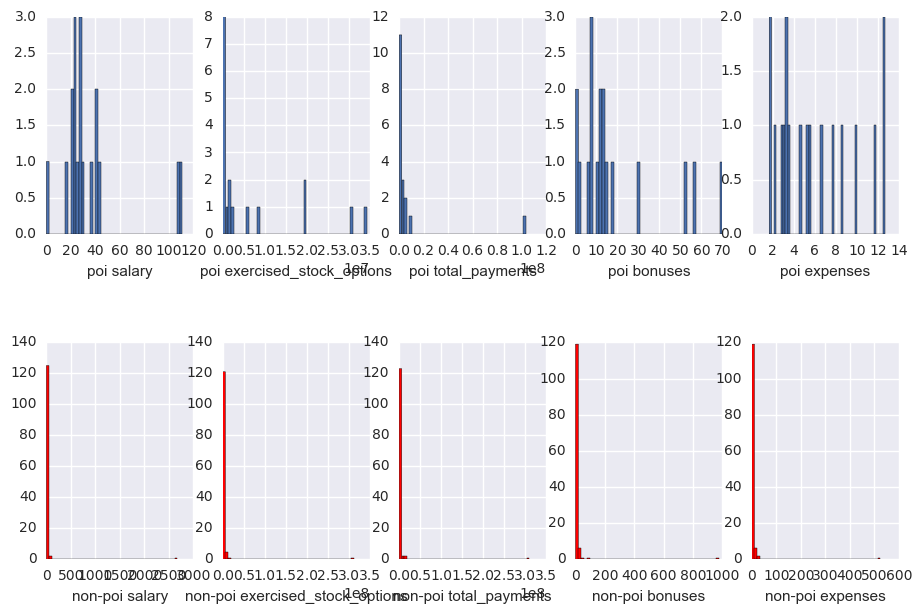

In [207]:
'''we will first compare the two '''

# list of POI values in the enron data
pois = finance_to_list(data_dict)[5]
poi_indices = []
non_poi_indices = []
c = -1
for i in pois:
    c +=1
    if int(i)==1: poi_indices.append(c)
    else: non_poi_indices.append(c)


def get_poi(poi_indices):     
    poi_sal = []
    poi_exe = []
    poi_tot = []
    poi_bon = []
    poi_exp = []
    for i in poi_indices:
        poi_sal.append(finance_to_list(data_dict)[0][i]/10000)
        poi_exe.append(finance_to_list(data_dict)[1][i])
        poi_tot.append(finance_to_list(data_dict)[2][i])
        poi_bon.append(finance_to_list(data_dict)[3][i]/100000)
        poi_exp.append(finance_to_list(data_dict)[4][i]/10000)
    return [poi_sal,poi_exe,poi_tot,poi_bon,poi_exp]


plt.rcParams['figure.figsize'] = (11, 7)
f, axarr = plt.subplots(2, 5)
axarr[0, 0].hist(get_poi(poi_indices)[0], bins = 50)
axarr[0, 0].set_xlabel('poi salary')
axarr[0, 1].hist(get_poi(poi_indices)[1], bins = 50)
axarr[0, 2].hist(get_poi(poi_indices)[2], bins = 50)
axarr[0, 2].set_xlabel('poi total_payments')
axarr[0, 3].hist(get_poi(poi_indices)[3], bins = 50)
axarr[0, 3].set_xlabel('poi bonuses')
axarr[0, 4].hist(get_poi(poi_indices)[4], bins = 50)
axarr[0, 4].set_xlabel('poi expenses')
axarr[1, 0].hist(get_poi(non_poi_indices)[0], bins = 50, color = "red")
axarr[1, 0].set_xlabel('non-poi salary')
axarr[1, 1].hist(get_poi(non_poi_indices)[1], bins = 50, color = "red")
axarr[1, 1].set_xlabel('non-poi exercised_stock_options')
axarr[1, 2].hist(get_poi(non_poi_indices)[2], bins = 50, color = "red")
axarr[1, 2].set_xlabel('non-poi total_payments')
axarr[1, 3].hist(get_poi(non_poi_indices)[3], bins = 50, color = "red")
axarr[1, 3].set_xlabel('non-poi bonuses')
axarr[1, 4].hist(get_poi(non_poi_indices)[4], bins = 50, color = "red")
axarr[1, 4].set_xlabel('non-poi expenses')
axarr[0, 1].set_xlabel('poi exercised_stock_options')
f.subplots_adjust(hspace=0.5)    

In [208]:
# there is an extreme outlier

for k, v in data_dict.items():
     if v['salary'] != 'NaN' and v['salary'] > 10000000: print k
            
#turns out to be the TOTAL row from the salaries & bonuses list, let's remove it
del data_dict["TOTAL"]
del data_dict['THE TRAVEL AGENCY IN THE PARK']

TOTAL


# Task 3: Creat New Feature(s)

It would make sense to take a closer look at the communication patterns of these names via email. So, I will first take a look at the relevant features.

 The number of these emails alone will not inform us anything specific. A better idea would be to make a few features from these to see the extent of a person's communication with the poi as a proportion of the total number of his/her emails. Therefor, I will make two additional features: first, from_poi_to_this_person/to_messages and seconf, from_this_person_to_poi/from_messages. we will then add these two features to the list of features. 
 
 I will also make a new feature for a peron's total financail activitiy (i.e total_money) by adding up these features: 'salary','total_stock_value','exercised_stock_options','bonus'

In [212]:
### Store to my_dataset for easy export below.
my_dataset = data_dict

## emails: 
for item in my_dataset:
    ind = my_dataset[item]
    if (all([ind['from_poi_to_this_person'] != 'NaN',ind['from_this_person_to_poi'] != 'NaN',
        ind['to_messages'] != 'NaN',ind['from_messages'] != 'NaN'])):
        fraction_from_poi = float(ind["from_poi_to_this_person"]) / float(ind["to_messages"])
        ind["ratio_from_poi"] = fraction_from_poi
        fraction_to_poi = float(ind["from_this_person_to_poi"]) / float(ind["from_messages"])
        ind["ratio_to_poi"] = fraction_to_poi
    else:
        ind["ratio_from_poi"] = ind["ratio_to_poi"] = 0


## Financial:
for item in my_dataset:
    ind = my_dataset[item]
    if (all([ind['salary'] != 'NaN', ind['total_stock_value'] != 'NaN', 
             ind['exercised_stock_options'] != 'NaN',ind['bonus'] != 'NaN'])):
        ind['total_money'] = sum([ind[field] for field in ['salary','total_stock_value','exercised_stock_options','bonus']])
    else:
        ind['total_money'] = 'NaN'

In [213]:
my_features = features_list + ['ratio_from_poi','ratio_to_poi','shared_receipt_with_poi','expenses','loan_advances',
                               'long_term_incentive','other','restricted_stock','restricted_stock_deferred','deferral_payments',
                                'deferred_income','salary','total_stock_value','exercised_stock_options','total_payments',
                               'bonus','total_money']


data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

print "features:", my_features


features: ['poi', 'salary', 'exercised_stock_options', 'total_payments', 'bonus', 'expenses', 'ratio_from_poi', 'ratio_to_poi', 'shared_receipt_with_poi', 'expenses', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'deferral_payments', 'deferred_income', 'salary', 'total_stock_value', 'exercised_stock_options', 'total_payments', 'bonus', 'total_money']


In [216]:
# Scale features
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# K-best features
k_best = SelectKBest(k=3)
k_best.fit(features, labels)

results_list = zip(k_best.get_support(), my_features[1:], k_best.scores_)
results_list = sorted(results_list, key=lambda x: x[2], reverse=True)
print "K-best features:", results_list

## 3 best features chosen by SelectKBest
my_features = features_list + ['exercised_stock_options','total_stock_value',
                                'bonus']

data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)

K-best features: [(True, 'exercised_stock_options', 24.250472354526192), (True, 'exercised_stock_options', 24.250472354526192), (True, 'total_stock_value', 23.613740454440904), (False, 'bonus', 20.257184998123947), (False, 'bonus', 20.257184998123947), (False, 'salary', 17.717873579243303), (False, 'total_payments', 8.5708230787309816), (False, 'expenses', 5.8153280019048754)]


In [217]:
data = featureFormat(my_dataset, my_features, sort_keys = True)
labels, features = targetFeatureSplit(data)
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
def doPCA(data): 
    from sklearn.decomposition import PCA
    pca = PCA(n_components = 3)
    pca.fit(data)
    return pca  
pca = doPCA(features_train)

#variance explained by first and second components respectively
print pca.explained_variance_ratio_


pca.fit(features_train)
# transform the train and test data into a new subspace via PCA
pca_features = pca.transform(features)


[ 0.90946975  0.07288793  0.01093054]


# Examine and tune different classifiers

In [218]:
# define tester function
def test_clf(grid_search, features, labels, parameters, iterations=100):
    from sklearn.metrics import classification_report
    precision, recall = [], []
    for iteration in range(iterations):
        features_train, features_test, labels_train, labels_test = train_test_split(features, labels, random_state=iteration)
        grid_search.fit(features_train, labels_train)
        predictions = grid_search.predict(features_test)
    print classification_report(labels_test, predictions)
    best_params = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print '%s=%r, ' % (param_name, best_params[param_name])

In [222]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
t0= time()
parameters = {'n_estimators': [10, 20, 40],
               'algorithm': ['SAMME', 'SAMME.R'],
               'learning_rate': [.5, 1, 1.5]}
grid_search = GridSearchCV(clf, parameters)
print '\nAdaBoost (pca features):'
test_clf(grid_search, pca_features, labels, parameters)
print '\nAdaBoost (Best k features):'
test_clf(grid_search, k_features, labels, parameters)
print '\nAdaBoost total time:{0}s'.format(round(time()-t0, 3))


AdaBoost (pca features):
             precision    recall  f1-score   support

        0.0       0.89      1.00      0.94        31
        1.0       1.00      0.20      0.33         5

avg / total       0.90      0.89      0.86        36

algorithm='SAMME', 
learning_rate=0.5, 
n_estimators=40, 

AdaBoost (Best k features):
             precision    recall  f1-score   support

        0.0       0.91      0.94      0.92        31
        1.0       0.50      0.40      0.44         5

avg / total       0.85      0.86      0.85        36

algorithm='SAMME', 
learning_rate=0.5, 
n_estimators=10, 

AdaBoost total time:484.804s


In [223]:
# decision tree
from sklearn import tree
clf = tree.DecisionTreeClassifier()
t0= time()
parameters = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [2, 10, 20],
               'max_depth': [None, 2, 5, 10],
               'min_samples_leaf': [1, 5, 10],
               'max_leaf_nodes': [None, 5, 10, 20]}
grid_search = GridSearchCV(clf, parameters)
print '\nDecision tree (pca features):'
test_clf(grid_search, pca_features, labels, parameters)
print '\nDecision Tree (Best k features):'
test_clf(grid_search, k_features, labels, parameters)
print '\nDecision tree total time:{0}s'.format(round(time()-t0, 3))


Decision tree (pca features):
             precision    recall  f1-score   support

        0.0       0.90      0.84      0.87        31
        1.0       0.29      0.40      0.33         5

avg / total       0.81      0.78      0.79        36

criterion='gini', 
max_depth=None, 
max_leaf_nodes=None, 
min_samples_leaf=1, 
min_samples_split=20, 

Decision Tree (Best k features):
             precision    recall  f1-score   support

        0.0       0.94      0.94      0.94        31
        1.0       0.60      0.60      0.60         5

avg / total       0.89      0.89      0.89        36

criterion='entropy', 
max_depth=None, 
max_leaf_nodes=None, 
min_samples_leaf=1, 
min_samples_split=10, 

Decision tree total time:345.967s


In [224]:
#Random Forest
from time import time
from sklearn.ensemble import RandomForestClassifier

t0= time()
parameters = {'n_estimators':[2,5,10], 'min_samples_split': [2,3,5], 
              'min_impurity_split' : [1e-7,1e-15,1e-20],'warm_start' : ['TRUE','FALSE']}
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, parameters)
print '\nrandom forest (pca features):'
test_clf(grid_search, pca_features, labels, parameters)
print '\nrandom forest (Best k features):'
test_clf(grid_search, k_features, labels, parameters)
print '\nRandom forest:{0}s'.format(round(time()-t0, 3))


random forest (pca features):
             precision    recall  f1-score   support

        0.0       0.86      0.97      0.91        31
        1.0       0.00      0.00      0.00         5

avg / total       0.74      0.83      0.78        36

min_impurity_split=1e-15, 
min_samples_split=3, 
n_estimators=2, 
warm_start='TRUE', 

random forest (Best k features):
             precision    recall  f1-score   support

        0.0       0.88      0.97      0.92        31
        1.0       0.50      0.20      0.29         5

avg / total       0.83      0.86      0.83        36

min_impurity_split=1e-07, 
min_samples_split=2, 
n_estimators=10, 
warm_start='FALSE', 

Random forest:610.256s


In [225]:
# Naive Bayse
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
t0= time()
parameters = {}
grid_search = GridSearchCV(clf, parameters)
print '\nGaussianNB (pca features):'
test_clf(grid_search, pca_features, labels, parameters)
print '\nGaussianNB (Best k features):'
test_clf(grid_search, k_features, labels, parameters)
print '\nNaive Bayse total time:{0}s'.format(round(time()-t0, 3))


GaussianNB (pca features):
             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94        31
        1.0       0.67      0.40      0.50         5

avg / total       0.88      0.89      0.88        36


GaussianNB (Best k features):
             precision    recall  f1-score   support

        0.0       0.91      0.97      0.94        31
        1.0       0.67      0.40      0.50         5

avg / total       0.88      0.89      0.88        36


Naive Bayse total time:1.304s


# Final Pickle files

In [229]:
clf = RandomForestClassifier(min_impurity_split=1e-07, min_samples_split=3,  n_estimators=5, warm_start='FALSE')

In [230]:
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(my_dataset, open("my_dataset.pkl", "w") )
pickle.dump(my_features, open("my_feature_list.pkl", "w") )

# Tester

In [231]:
import pickle
import sys
from sklearn.cross_validation import StratifiedShuffleSplit
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

PERF_FORMAT_STRING = "\
\tAccuracy: {:>0.{display_precision}f}\tPrecision: {:>0.{display_precision}f}\t\
Recall: {:>0.{display_precision}f}\tF1: {:>0.{display_precision}f}\tF2: {:>0.{display_precision}f}"
RESULTS_FORMAT_STRING = "\tTotal predictions: {:4d}\tTrue positives: {:4d}\tFalse positives: {:4d}\
\tFalse negatives: {:4d}\tTrue negatives: {:4d}"

def test_classifier(clf, dataset, feature_list, folds = 1000):
    data = featureFormat(dataset, feature_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    cv = StratifiedShuffleSplit(labels, folds, random_state = 42)
    true_negatives = 0
    false_negatives = 0
    true_positives = 0
    false_positives = 0
    for train_idx, test_idx in cv: 
        features_train = []
        features_test  = []
        labels_train   = []
        labels_test    = []
        for ii in train_idx:
            features_train.append( features[ii] )
            labels_train.append( labels[ii] )
        for jj in test_idx:
            features_test.append( features[jj] )
            labels_test.append( labels[jj] )
        
        ### fit the classifier using training set, and test on test set
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        for prediction, truth in zip(predictions, labels_test):
            if prediction == 0 and truth == 0:
                true_negatives += 1
            elif prediction == 0 and truth == 1:
                false_negatives += 1
            elif prediction == 1 and truth == 0:
                false_positives += 1
            elif prediction == 1 and truth == 1:
                true_positives += 1
            else:
                print "Warning: Found a predicted label not == 0 or 1."
                print "All predictions should take value 0 or 1."
                print "Evaluating performance for processed predictions:"
                break
    try:
        total_predictions = true_negatives + false_negatives + false_positives + true_positives
        accuracy = 1.0*(true_positives + true_negatives)/total_predictions
        precision = 1.0*true_positives/(true_positives+false_positives)
        recall = 1.0*true_positives/(true_positives+false_negatives)
        f1 = 2.0 * true_positives/(2*true_positives + false_positives+false_negatives)
        f2 = (1+2.0*2.0) * precision*recall/(4*precision + recall)
        print clf
        print PERF_FORMAT_STRING.format(accuracy, precision, recall, f1, f2, display_precision = 5)
        print RESULTS_FORMAT_STRING.format(total_predictions, true_positives, false_positives, false_negatives, true_negatives)
        print ""
    except:
        print "Got a divide by zero when trying out:", clf
        print "Precision or recall may be undefined due to a lack of true positive predicitons."

CLF_PICKLE_FILENAME = "my_classifier.pkl"
DATASET_PICKLE_FILENAME = "my_dataset.pkl"
FEATURE_LIST_FILENAME = "my_feature_list.pkl"

def dump_classifier_and_data(clf, dataset, feature_list):
    with open(CLF_PICKLE_FILENAME, "w") as clf_outfile:
        pickle.dump(clf, clf_outfile)
    with open(DATASET_PICKLE_FILENAME, "w") as dataset_outfile:
        pickle.dump(dataset, dataset_outfile)
    with open(FEATURE_LIST_FILENAME, "w") as featurelist_outfile:
        pickle.dump(feature_list, featurelist_outfile)

def load_classifier_and_data():
    with open(CLF_PICKLE_FILENAME, "r") as clf_infile:
        clf = pickle.load(clf_infile)
    with open(DATASET_PICKLE_FILENAME, "r") as dataset_infile:
        dataset = pickle.load(dataset_infile)
    with open(FEATURE_LIST_FILENAME, "r") as featurelist_infile:
        feature_list = pickle.load(featurelist_infile)
    return clf, dataset, feature_list

def main():
    ### load up student's classifier, dataset, and feature_list
    clf, dataset, feature_list = load_classifier_and_data()
    ### Run testing script
    test_classifier(clf, dataset, feature_list)

if __name__ == '__main__':
    main()


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start='FALSE')
	Accuracy: 0.97087	Precision: 0.94128	Recall: 0.83350	F1: 0.88412	F2: 0.85303
	Total predictions: 15000	True positives: 1667	False positives:  104	False negatives:  333	True negatives: 12896



# Discussion

In this project I intended to predict the Points of Interests based on a number of features extracted from the Enron email dataset. I took the following steps to accomplish this project: first, I identified a number of outliers in the dataset and removed them. Next, I created three features and added to the dataset as the new features , which represented the ratio of emails sent and received from the point of interest to an individual and I found thiese features to be more informative as well as the total financial status of a person. After adding these features, I ended up with a high-dimensional dataset which is of course prone to overfitting. In order to remedy this, I conducted both PCA with 3 components and best k features selection again with k=3.  Using these features, I tried a number of different classifiers on this dataset. The best classifier that I found was a random forest classifier (i.e. clf = RandomForestClassifier(min_impurity_split=1e-07, min_samples_split=3,  n_estimators=5, warm_start='FALSE') which resulted in a F1 score of 0.88, recall of 0.83 and percision of 0.94 and the Accuracy of 0.97.   